In [4]:
from incremental_explainer.utils.saliency_maps import compute_saliency_maps
import cv2
from ultralytics import YOLO

image_location = f"datasets/LaSOT/0/00000001.jpg"
print(f"Processing image: {image_location}")
model = YOLO("yolov10n.pt")
img = cv2.imread(image_location)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = model(img, verbose=False)
saliency = compute_saliency_maps(results, image_location, model, nummasks=100)

Processing image: datasets/LaSOT/0/00000001.jpg


100%|██████████| 99/99 [00:00<00:00, 195.65it/s]


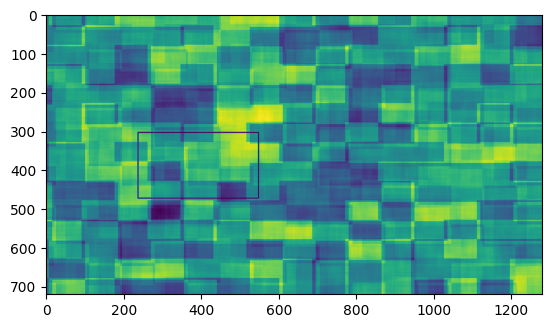

In [5]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

index = 0
class_index = int(results[0].boxes.cls[index])
saliency_map = np.array(saliency[index]['detection']).transpose(1, 2, 0)[:,:,0]
bounding_box = np.array(results[0].boxes.xyxy[index])

plt.imshow(cv2.rectangle(saliency_map, (int(bounding_box[0]), int(bounding_box[1])), (int(bounding_box[2]), int(bounding_box[3])), (0, 255, 0), 2))



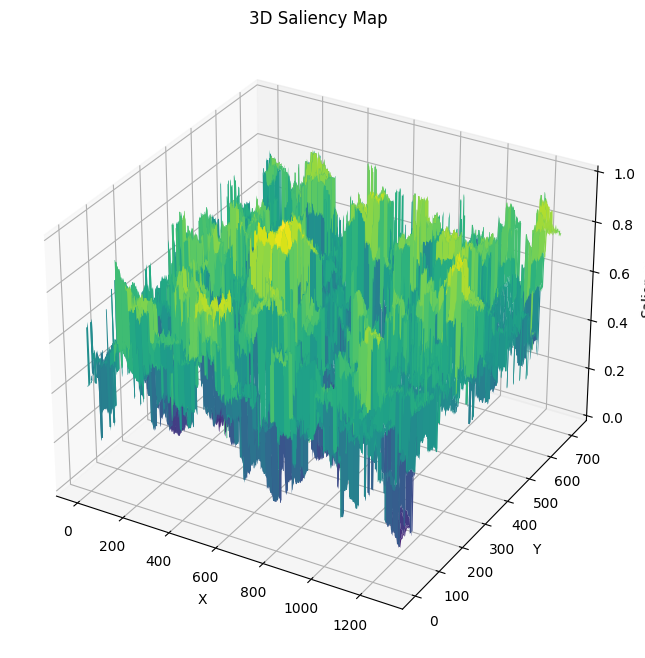

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate meshgrid for x and y coordinates
x, y = np.meshgrid(np.arange(saliency_map.shape[1]), np.arange(saliency_map.shape[0]))

# Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D surface
ax.plot_surface(x, y, saliency_map, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Saliency')
plt.title('3D Saliency Map')

plt.show()

In [7]:
from incremental_explainer.metrics.deletion import compute_deletion

compute_deletion(model, saliency_map, img, class_index, bounding_box, divisions = 1000)

0.008680211404526027

In [8]:
from incremental_explainer.metrics.insertion import compute_insertion


compute_insertion(model, saliency_map, img, class_index, bounding_box, divisions = 1000)

0.01271832860440435

In [9]:
from incremental_explainer.metrics.epg import compute_energy_based_pointing_game

compute_energy_based_pointing_game(saliency_map, bounding_box)

0.055592867717388604